# Exploration 5. 닮은꼴 연예인 찾기

## <탐험 목표>
1. 이미지 파일을 불러와 얼굴 영역 잘라내기
2. 잘라낸 얼굴에 대하여 임베딩 벡터 추출하기
3. 구해진 임베딩 벡터를 활용하여 닮은꼴 얼굴 찾기
4. 일정 조건을 충족하는 연예인 리스트 Top 5 출력하기

### 필요한 라이브러리 불러오기

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition
import numpy as np

### 이미지 세팅하기

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/face_embedding/girls/ksm3.jpg' # 내 이미지
image_path = os.getenv('HOME')+'/aiffel/face_embedding/girls/아이즈원김채원.jpg' # 샘플 이미지

### 얼굴 영역만 자르는 함수 생성하기

In [3]:
# 얼굴 영역만 자르는 함수 -> 리스트(안에 튜플로 얼굴 좌표) 반환
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image) # 발견된 얼굴 좌표의 튜플 목록(top, right, bottom, left)
    print(face_locations, image_file) # list 반환 / 요소는 튜플(a,b,c,d)
    
    a,b,c,d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

[(192, 291, 415, 68)] /aiffel/aiffel/face_embedding/girls/ksm3.jpg


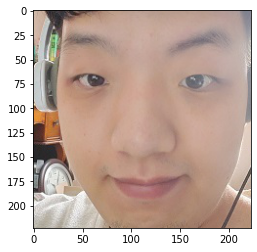

In [4]:
# 내 이미지에 대한 얼굴 영역만 잘라내어 나타내기
my_cropped_face = get_cropped_face(my_image_path)
plt.imshow(my_cropped_face)

[(139, 345, 325, 159)] /aiffel/aiffel/face_embedding/girls/아이즈원김채원.jpg


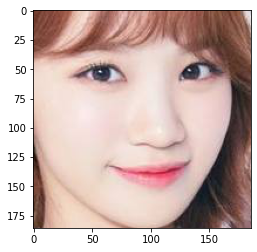

In [5]:
# 아이즈원 김채원 님 얼굴 영역만 잘라내어 나타내기
cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### 내 얼굴 영역의 임베딩 벡터 구하기

In [6]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/girls'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['아이유.jpg', '비니.jpg', '트와이스다현.jpeg', '지호.jpg', '잇지예지.jpeg', '잇지유나.jpg', '트와이스나연.jpg', '아이즈원조유리.jpeg', '승희.jpeg', '솔라.jpg', '사쿠라.jpg', '도아.jpeg', '트와이스미나.jpg', '로제.jpg', '문별.jpg', '아이즈원김채원.jpg', 'ksm3.jpg', '유아.jpg', '채연.jpg', '레드벨벳웬디.jpg', '지수.jpg']


**아래와 같이 임베딩 벡터를 리스트로 출력할 수 있는 경우는 crop이 정상적으로 수행된 이미지일 것이다.**

In [7]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

image_file = os.path.join(dir_path, 'ksm3.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

embedding = get_face_embedding(face)  
embedding

[(192, 291, 415, 68)] /aiffel/aiffel/face_embedding/girls/ksm3.jpg


[array([-0.1032133 ,  0.04625779, -0.02131296, -0.06636488, -0.09640318,
        -0.1006405 , -0.03486301, -0.12826408,  0.13505115, -0.13638014,
         0.20286973, -0.10241512, -0.17383161, -0.06639544, -0.03145439,
         0.21502112, -0.20261993, -0.14054444, -0.03063127,  0.00494416,
         0.13322559, -0.01738246, -0.06571448,  0.08162466, -0.18073234,
        -0.28472909, -0.07564045, -0.07168267, -0.00255678, -0.04577484,
         0.00664028,  0.02382705, -0.21265665, -0.04655406,  0.05269361,
         0.04099672,  0.00414176, -0.07022127,  0.23284011,  0.01195433,
        -0.27127469,  0.03900693,  0.08128583,  0.23840903,  0.14235376,
         0.01877544,  0.02714115, -0.17250404,  0.16616482, -0.16029324,
        -0.00875125,  0.11641963,  0.06433196,  0.04386159,  0.01233065,
        -0.1234604 ,  0.04207293,  0.13586326, -0.18985623,  0.02880018,
         0.10492035, -0.0510796 , -0.04917385, -0.13024245,  0.24649769,
         0.0296559 , -0.1614144 , -0.14455894,  0.1

### 모든 여자 연예인의 임베딩 벡터 구하기

In [8]:
# 경로에 있는 모든 이미지의 얼굴 영역 임배딩 벡터 구해서 dict에 담음
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [9]:
# 잘 되는지 확인
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/girls/'
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['아이즈원김채원']

[(160, 428, 345, 242)] /aiffel/aiffel/face_embedding/girls/아이유.jpg
[(502, 1019, 1168, 354)] /aiffel/aiffel/face_embedding/girls/비니.jpg
[(133, 322, 288, 167)] /aiffel/aiffel/face_embedding/girls/트와이스다현.jpeg
[(313, 776, 634, 455)] /aiffel/aiffel/face_embedding/girls/지호.jpg
[(68, 163, 175, 55)] /aiffel/aiffel/face_embedding/girls/잇지예지.jpeg
[(502, 913, 965, 451)] /aiffel/aiffel/face_embedding/girls/잇지유나.jpg
[(320, 498, 587, 230)] /aiffel/aiffel/face_embedding/girls/트와이스나연.jpg
[(44, 118, 95, 66)] /aiffel/aiffel/face_embedding/girls/아이즈원조유리.jpeg
[(134, 562, 455, 241)] /aiffel/aiffel/face_embedding/girls/승희.jpeg
[(170, 562, 491, 241)] /aiffel/aiffel/face_embedding/girls/솔라.jpg
[(116, 253, 270, 98)] /aiffel/aiffel/face_embedding/girls/사쿠라.jpg
[(63, 104, 138, 30)] /aiffel/aiffel/face_embedding/girls/도아.jpeg
[(217, 464, 440, 241)] /aiffel/aiffel/face_embedding/girls/트와이스미나.jpg
[(160, 386, 345, 201)] /aiffel/aiffel/face_embedding/girls/로제.jpg
[(162, 675, 547, 290)] /aiffel/aiffel/face_embedding/g

array([-0.07443575, -0.02187886,  0.04242077, -0.08436356, -0.11115077,
       -0.06262422, -0.08843666, -0.06580611,  0.15810302, -0.0872753 ,
        0.19777222, -0.07652595, -0.25420401, -0.03478248, -0.05785744,
        0.22993018, -0.13597979, -0.11958444, -0.06653187,  0.02391308,
        0.01613099,  0.02644874,  0.06469648,  0.05195381, -0.14995722,
       -0.33400983, -0.0998899 , -0.02402597, -0.13263763, -0.06138576,
       -0.0318749 ,  0.08003838, -0.16244419,  0.00128721,  0.08620679,
        0.12377416, -0.02288324, -0.08900576,  0.14318378, -0.00043186,
       -0.32567632,  0.02195566,  0.09834453,  0.23492226,  0.17692468,
        0.02283812, -0.00116111, -0.16875842,  0.11026144, -0.16323523,
        0.07110538,  0.1099134 ,  0.07847872, -0.01523766,  0.0178498 ,
       -0.09456739,  0.01503636,  0.22956365, -0.16715349, -0.03499439,
        0.1052196 , -0.05126929, -0.02996347, -0.16179538,  0.20939091,
        0.12332319, -0.17543413, -0.21446706,  0.10372923, -0.15

### 두 임베딩 벡터의 거리 구하기

In [18]:
# 두 임배딩 벡터간 거리 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(get_distance('사쿠라', 'ksm3'))

0.522421367324805


### 닮은꼴 여자 연예인을 찾기 위한 이미지를 저장하는 함수 만들기

In [11]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('ksm3')

### 닮은꼴 순위 Top 5 알아보기

In [16]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 닮은꼴 연예인을 찾는 것이 문제이므로, 자기 자신의 이미지는 제외
            continue
        if sorted_faces[i]:
            print('{}위 : {}, 임베딩 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [17]:
# 나와 가장 닮은 연예인은?
get_nearest_face('ksm3')

1위 : 지수, 임베딩 거리(0.4814462700529104)
2위 : 아이즈원조유리, 임베딩 거리(0.48857446095633034)
3위 : 유아, 임베딩 거리(0.5096056723684577)
4위 : 비니, 임베딩 거리(0.5102794083621334)
5위 : 승희, 임베딩 거리(0.5146269244480511)


## ★프로젝트 회고★

- 우선 결과 해석을 하기 전에, Top 5를 출력하는 데 있어 애를 많이 먹었다. 작업과정에서 간간히 에러가 나와서 어려움이 있었는데 드디어 선별한 약 20명의 여자 아이돌을 대상 데이터로 하여 닮은꼴 여자 아이돌 Top 5를 찾아내었다!!
- **20명 내외의 여자 아이돌 데이터는 사실 강남캠퍼스의 수희 퍼실님의 celebrity 데이터의 일부분**이었다. 모든 데이터를 다 대상 데이터로 해도 무방하긴 하나, 조금 색다른 시도를 해 보고 싶어서 작업기준을 '여자 아이돌'로 한정하여 프로젝트를 진행하였다.
- 필자는 남성이어서 '임베딩 거리가 0.5 이내가 되는 여자 아이돌은 나오지 않겠지?' 라는 의문점을 가지고 프로젝트를 진행하였다.
- 프로젝트를 수행한 결과 **블랙핑크 지수, 아이즈원 조유리** 이상 2명이 루브릭 기준인 임베딩 거리 0.5 이내의 기준을 충족하는 닮은꼴 여자 아이돌이었음을 확인할 수 있었다.
- 시간 관계상 시각화는 시도해보지는 못했다. 나중에 시간이 된다면 직접 위 결과를 시각화해보고 싶다!

**ps) 강남 캠퍼스 수희 퍼실님, 좋은 데이터 제공해주셔서 감사합니다!**

## 닮은꼴 임베딩 0.5 이내 여자 아이돌 사진 공개!

[[1위 - 블랙핑크 지수]](https://8888-wtsiehuqb4j60e61buib9g6uz.e.aiffel-3.ainetwork.ai/view/aiffel/face_embedding/girls/지수.jpg "닮은꼴 여자 아이돌 1위!")

[[2위 - 아이즈원 조유리]](https://8888-wtsiehuqb4j60e61buib9g6uz.e.aiffel-3.ainetwork.ai/view/aiffel/face_embedding/girls/아이즈원조유리.jpeg "닮은꼴 여자 아이돌 2위!")